In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


## Exercice 4 : impact et detection d'outliers



b_0=5.170486407753312 et b_1=5.384680201305171


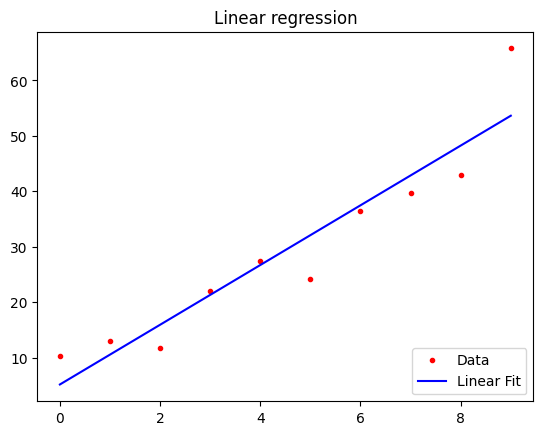

In [32]:
#generation de donnees test
def generate_data(n_samples, outlier=False, b_1=4.):
    x = np.arange(n_samples)
    y = 10. + b_1*x + np.random.randn(n_samples)*3.
    if outlier:
        y[-1] += 20
    return x, y

def s2(y_true, y_pred):
    n = len(y_true)
    SSE = np.sum((y_true - y_pred)**2)
    return SSE / (n-1)


x, y = generate_data(n_samples=10, outlier=True)
# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# representation du resultat

print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))

fig = plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


### <span style="color:blue">QUESTION 4.1 :</span> 


Remarquons que la ligne 'y[9]=y[9]+20' génere artificiellement une donnée aberrante.

Tester l'impact de la donnée aberrante en estimant b_0, b_1 et s^2 sur 
- 5 jeux de données générés comme dans la cellule précédente et
- 5 autres jeux aussi générés suivant cette méthode, mais sans la données aberrant (simplement ne pas executer la ligne y[9]=y[9]+20).

On remarque que $\beta_0 = 10$, $\beta_1 = 4$ et $\sigma=3$ dans les données simulees.


### <span style="color:blue">REPONSE 4.1 :</span> 



In [33]:
b_bank = [[0,0],[0,0],[0,0],[0,0],[0,0]]
for i in range(5):
    #data sans outlier
    x,y = generate_data(10, outlier=False)
    lr = LinearRegression()
    lr.fit(x[:, np.newaxis], y)
    s_2 = s2(y, x*lr.coef_[0] + lr.intercept_)
    print("s2 : ", s_2)
    b_bank[i] = lr.intercept_, lr.coef_[0]
    #fig = plt.figure()
    #plt.plot(x, y, 'r.')
    #plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
    #plt.legend(('Data', 'Linear Fit'), loc='lower right')
    #plt.title('Linear regression')
    #plt.show()

print("table des valeurs b0 | b1 sans outlier :")
for i in range(5):
    print(float(b_bank[i][0]), ' | ', float(b_bank[i][1]))

b_bank2 = [[0,0],[0,0],[0,0],[0,0],[0,0]]
for i in range(5):
    #data avec outlier
    x,y = generate_data(10, outlier=True)
    lr = LinearRegression()
    lr.fit(x[:, np.newaxis], y)
    s_2 = s2(y, x*lr.coef_[0] + lr.intercept_)
    print("s2 : ", s_2)
    b_bank2[i] = lr.intercept_, lr.coef_[0]
    #fig = plt.figure()
    #plt.plot(x, y, 'r.')
    #plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
    #plt.legend(('Data', 'Linear Fit'), loc='lower right')
    #plt.title('Linear regression')
    #plt.show()

print("\ntable des valeurs b0 | b1 avec outlier :")
for i in range(5):
    print(float(b_bank2[i][0]), ' | ', float(b_bank2[i][1]))        

s2 :  8.040936900648896
s2 :  14.871205651511664
s2 :  6.456678496323179
s2 :  4.9243065256156475
s2 :  7.218858719698343
table des valeurs b0 | b1 sans outlier :
8.127782722376175  |  4.132815163671599
10.563778173095713  |  3.7621267901402162
4.192151679777215  |  4.879749514137473
12.045800373085306  |  3.9409692987590423
10.69299575443247  |  4.0960642348064
s2 :  36.15730854696457
s2 :  35.307740036789674
s2 :  35.3334273694976
s2 :  57.58932940511285
s2 :  36.83990041722504

table des valeurs b0 | b1 avec outlier :
8.821889215472595  |  5.133966338245519
7.155579091498019  |  4.821548450336119
4.652369394461548  |  5.53089510680013
4.706761498953135  |  5.4855154091282285
7.158209883504174  |  5.2757345675571745


La variance estimée du bruit est beaucoup plus grande avec une donnée aberrante.
La donnée aberrante introiduit un biais dans l'estimation des statistiques b_0 et b_1.


### <span style="color:blue">QUESTIONS 4.2 :</span> 

#### <span style="color:blue">QUESTION 4.2.a :</span> 
Pour chaque variable i, calculez les profils des résidus $e_{(i)j}=y_j - \hat{y_{(i)j}}$ pour tous les j, où  \hat{y_{(i)j}} est l'estimation de y_j à partir d'un modele  linéaire appris sans l'observation i.
#### <span style="color:blue">QUESTION 4.2.b :</span> 
En quoi le profil des e_{(i)j} est différent pour i=9 que pour les autres i
#### <span style="color:blue">QUESTION 4.2.c :</span> 
Etendre ces calculs pour définir la distance de Cook de chaque variable i

AIDE : pour enlever un élement 'i' de 'x' ou 'y', utiliser x_del_i=np.delete(x,i) et y_del_i=np.delete(y,i) 


In [47]:
x, y = generate_data(n_samples=10, outlier=True)

#### <span style="color:blue">REPONSE 4.2.a :</span> 


In [48]:
#4.2.a
def profil_residus(x, y_vrai, i):
    x_sans_i = np.delete(x,i)
    y_sans_i = np.delete(y_vrai,i)
    lr = LinearRegression()
    lr.fit(x_sans_i[:, np.newaxis], y_sans_i)
    coefs = [lr.intercept_, lr.coef_[0]]
    errors_i = y_vrai - (coefs[0] + x*coefs[1])

    return errors_i

In [49]:
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)
reg_lin = lr.intercept_, lr.coef_[0]


errors_matrix = np.zeros((len(x), len(x)))
for i in range(len(x)):
    errors_matrix[i] = profil_residus(x, y, i)

#### <span style="color:blue">REPONSE 4.2.b :</span> 

Le profil résiduel de la donnée aberrante est toujours plus grand que les autres, en particulier lorsqu'on ôte la donnée de la base d'apprentissage.

In [50]:
#4.2.b
for i in range(len(errors_matrix)):
    print(np.mean(errors_matrix[i]))
#on observe la moyenne des résidus est bien plus élevée (d'un OdG) en ignorant i=9

0.4806297287229569
0.36512917800781486
0.2869980713996275
-0.5219943192454715
0.010670170762101172
0.03625519945801212
-0.7732700616840674
-1.0182497454461044
-0.5640461296858714
2.3313058799777773


#### <span style="color:blue">REPONSE 4.2.c :</span> 


In [ ]:
#4.2.c
def calculate_cook(errors_matrix):
    D = np.zeros(len(errors_matrix))
    for i in range(len(errors_matrix)):
        D[i] = sum(errors_matrix[i]**2)/(2*s2(y,reg_lin[0] + reg_lin[1]*x))
    return D

print(calculate_cook(errors_matrix))
#la distance de cook vaut environ 4.5 pour toutes les valeurs sauf en i=9 où elle vaut 6.5

[4.58743955 4.5362985  4.51586236 4.53799817 4.50001285 4.50014839
 4.58338606 4.69967257 4.58662134 6.55724096]


## Question Bonus

Pour un jeu de données de 20 observations obtenues avec un coefficient directeur $\beta_1$ de $0.2$, faire un test d'hypothèse pour vérifier que les données sont corrélées avec une confiance de 95%. 

On rappelle que sous les hypothèses suivantes : 
 * $\mathbb{E}[\epsilon_i] = 0$,
 * $\mathbb{V}[\epsilon_i] = \sigma^2$,
 * $\forall i \neq j, \: Cov(\epsilon_i, \epsilon_j) = 0$,
 
on a : 

* $\mathbb{E}[\hat{\beta_0}] = \beta_0$,
* $\mathbb{E}[\hat{\beta_1}] = \beta_1$,
* $\mathbb{V}[\hat{\beta_0}] = \sigma^2(\frac{1}{n} + \frac{\bar{x_n}^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\mathbb{V}[\hat{\beta_1}] = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}$

En faisant l'hypothèse supplémentaire que les erreurs suivent une loi normale, $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$, on a :

* $\hat{\beta_1} \sim \mathcal{N}(\beta_1, \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\frac{(n-2) \cdot s^2}{\sigma^2} \sim \mathcal{X}^2(n-2)$,
* $\hat{\beta_1}$ et $s^2$ indépendants,

où $s^2 = \frac{\sum_{i=1}^n \hat{\epsilon_i}^2}{n-2}$ est un estimateur non biaisé de $\sigma^2$.

On peut en déduire que:

$$ \frac{ \frac{ \hat{\beta_1}-\beta_1}{\sqrt{\frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}}}}{\sqrt{\frac{\frac{(n-2)s^2}{\sigma^2}}{n-2}}} = \frac{\hat{\beta_1}-\beta_1}{\frac{s}{\sqrt{\sum_{i=1}^n (x_i - \bar{x_n})^2}}} = T_n \sim T(n-2)$$ 

où $T(n-2)$ désigne la loi de Student à $n-2$ degrés de liberté, d'espérance nulle si $n-2 > 1$.

Tester l'hypothèse H_0 : $\beta_1 = 0$ en prenant un risque de 5%. 

In [ ]:
from scipy.stats import t


...